In [1]:
import networkx as nx
import random

random.seed(8964)

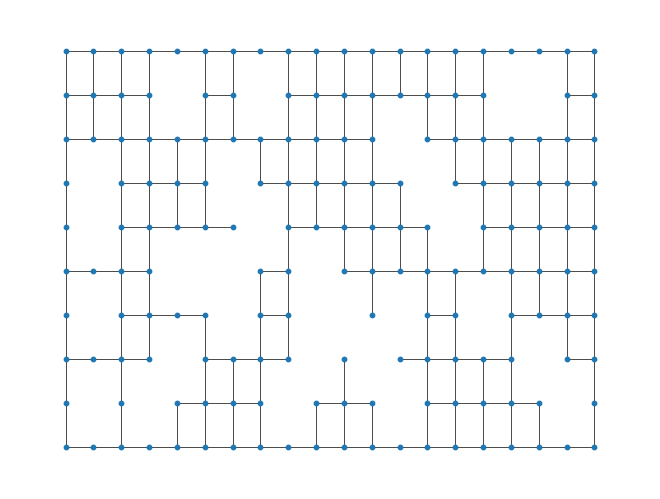

In [2]:
n_x = 20
n_y = 10

G = nx.grid_2d_graph(n_x, n_y)

# Set pos
for node in G.nodes:
    G.nodes[node]['pos'] = node

# Set all weights to 1
for edge in G.edges:
    G.edges[edge]['weight'] = 1

# Randomly remove 30 nodes not on the outside of the grid
remove = random.sample(
    list(filter(lambda xy: xy[0] != 0 and xy[1] != 0 and xy[0] != n_x - 1 and xy[1] != n_y - 1,
                list(G.nodes))),
    k=30
)
G.remove_nodes_from(remove)

nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size = 10, width=0.5)

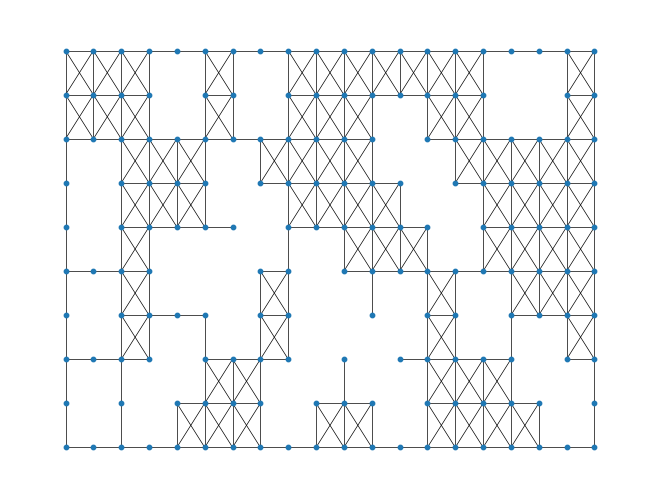

In [3]:
# ADD DIAGONALS, BUT ONLY WITHIN COMPLETE BOXES

for x in range(n_x):
    for y in range(n_y):
        if ((x, y) in G.nodes) and ((x-1, y-1) in G.nodes) and ((x, y-1) in G.nodes) and ((x-1, y) in G.nodes):
            G.add_edge((x, y), (x-1, y-1), weight = 2**0.5)
        if ((x, y) in G.nodes) and ((x-1, y+1) in G.nodes) and ((x, y+1) in G.nodes) and ((x-1, y) in G.nodes):
            G.add_edge((x, y), (x-1, y+1), weight = 2**0.5)

nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size = 10, width=0.5)


In [4]:
# A* HEURISTIC -- gives lower bound on distance
def h(node0, node1):
    a = abs(node1[0] - node0[0])  # horizontal distance
    b = abs(node1[1] - node0[1])  # vertical distance
    diag = min(a,b)               # travel diagonally until shorter x-y distance reached
    remain = max(a,b) - diag      # travel orthogonally for remaining distance
    return diag*2**0.5 + remain

19.899494936611667


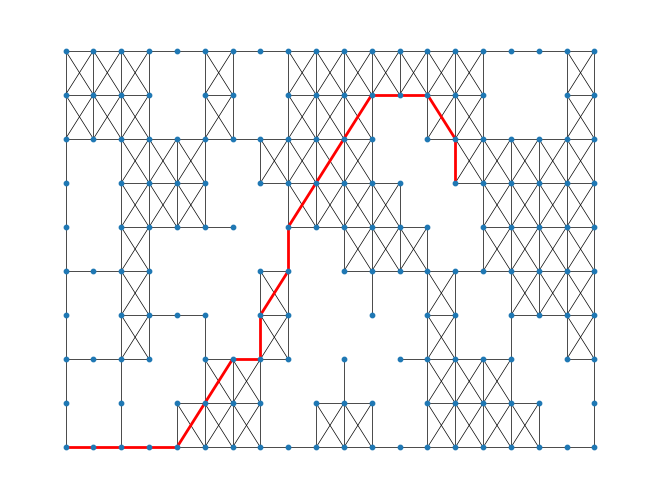

In [5]:
orig = (14,6)
dest = (0,0)
path = nx.astar_path(G, orig, dest, h)
path_len = nx.astar_path_length(G, orig, dest, h)
print(path_len)
path_edges = list(zip(path,path[1:]))
nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size = 10, width=0.5)
nx.draw_networkx_edges(G, nx.get_node_attributes(G, 'pos'), edgelist=path_edges, width=2, edge_color='r')